<a id='import-libaries'></a>
## 0) Import libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='import-data'></a>
## 1) Import data

In [9]:
taxi_data = pd.read_parquet('data/yellow_tripdata_2019-01.parquet')

In [10]:
taxi_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,1.0,N,151,239,1,7.00,0.50,0.5,1.65,0.00,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,1.0,N,239,246,1,14.00,0.50,0.5,1.00,0.00,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.00,1.0,N,236,236,1,4.50,0.50,0.5,0.00,0.00,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.00,1.0,N,193,193,2,3.50,0.50,0.5,0.00,0.00,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.00,2.0,N,193,193,2,52.00,0.00,0.5,0.00,0.00,0.3,55.55,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696612,2,2019-01-31 23:37:20,2019-02-01 00:10:43,NaN,10.24,NaN,None,142,95,0,0.00,2.75,0.0,0.00,5.76,0.3,0.00,NaN,None
7696613,2,2019-01-31 23:28:00,2019-01-31 23:50:50,NaN,12.43,NaN,None,48,213,0,48.80,5.50,0.0,0.00,0.00,0.3,54.60,NaN,None
7696614,2,2019-01-31 23:11:00,2019-01-31 23:46:00,NaN,9.14,NaN,None,159,246,0,51.05,2.75,0.5,0.00,0.00,0.3,54.60,NaN,None
7696615,2,2019-01-31 23:03:00,2019-01-31 23:14:00,NaN,0.00,NaN,None,265,265,0,0.00,0.00,0.5,9.82,0.00,0.3,0.00,NaN,None


In [12]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'total_amount']]

In [14]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,7.0,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,14.0,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,4.5,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,3.5,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,52.0,55.55


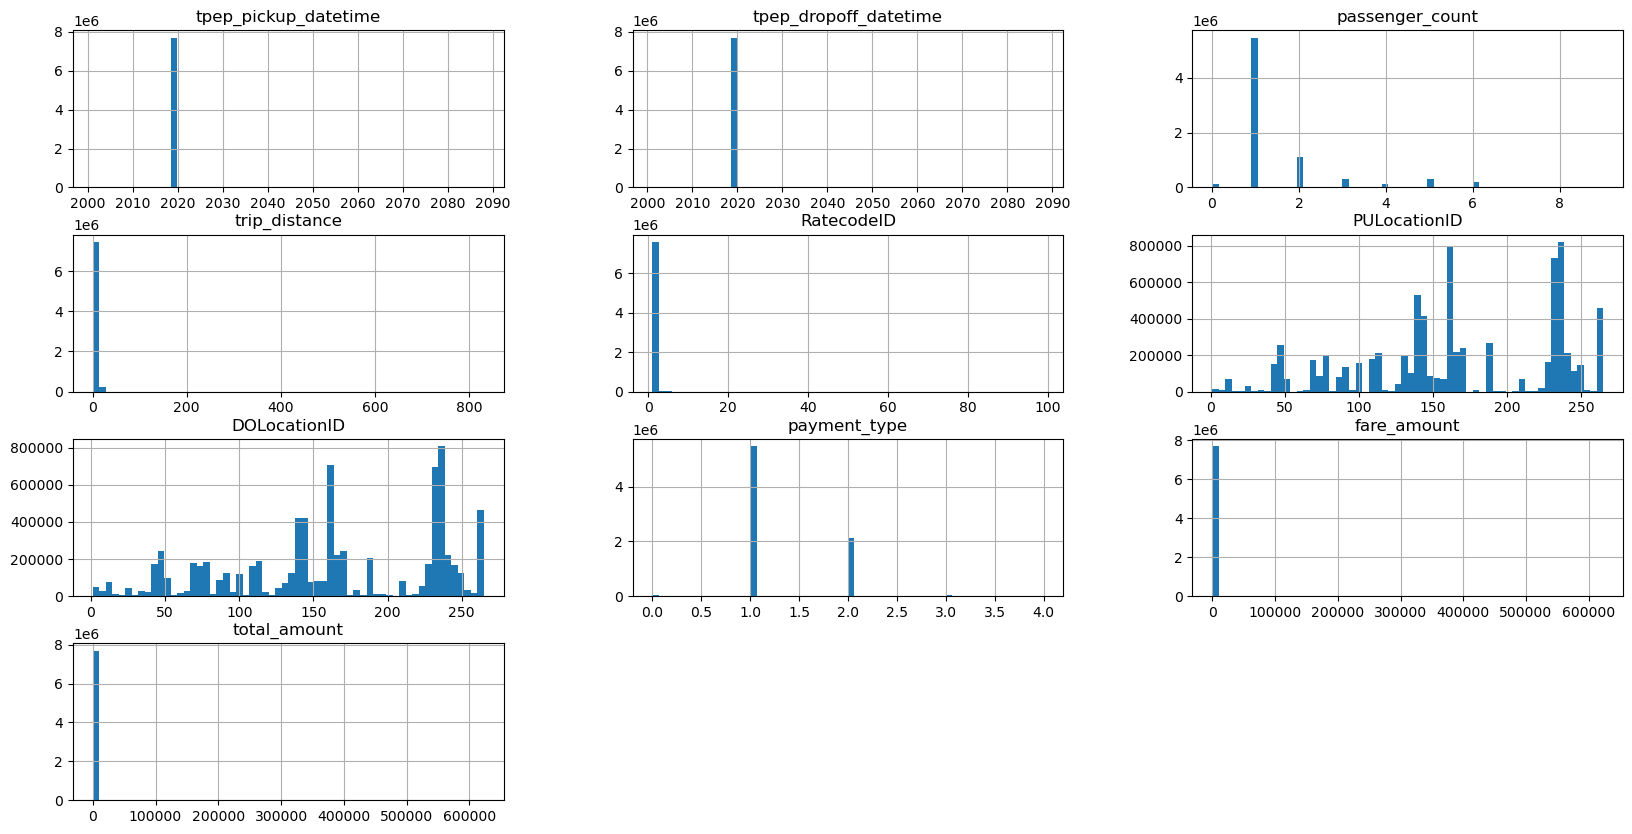

In [24]:
taxi_data.hist(figsize=(20,10),bins=60)
plt.show()

In [26]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: count, dtype: int64

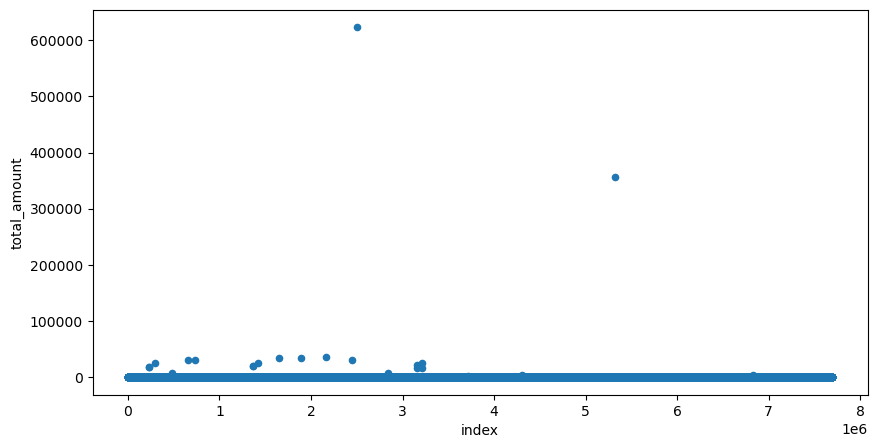

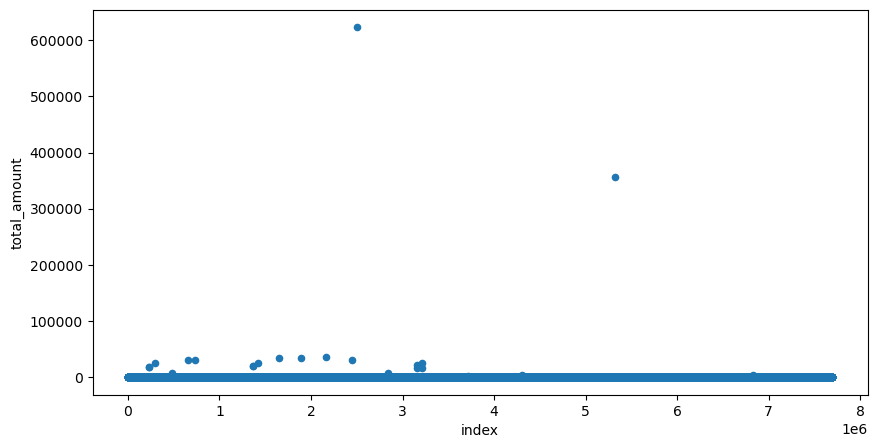

In [28]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.show()

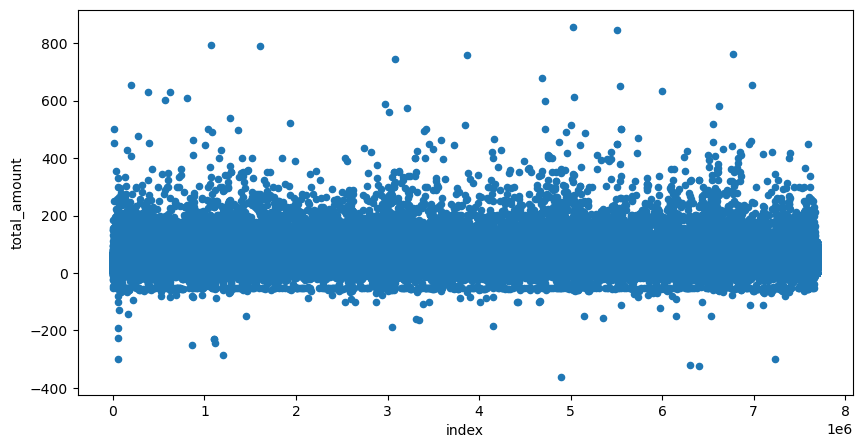

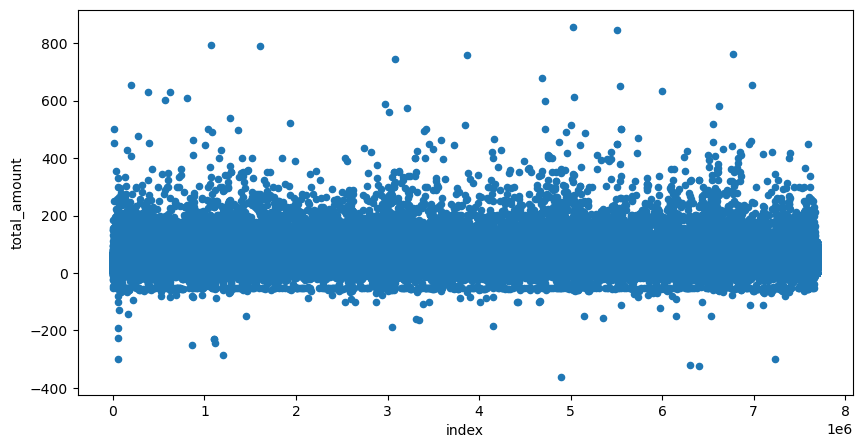

In [31]:
taxi_data[taxi_data['total_amount'] <1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.show()

In [33]:
# negative amounts
# have to take care of the negative values and the outliers

(7127, 10)


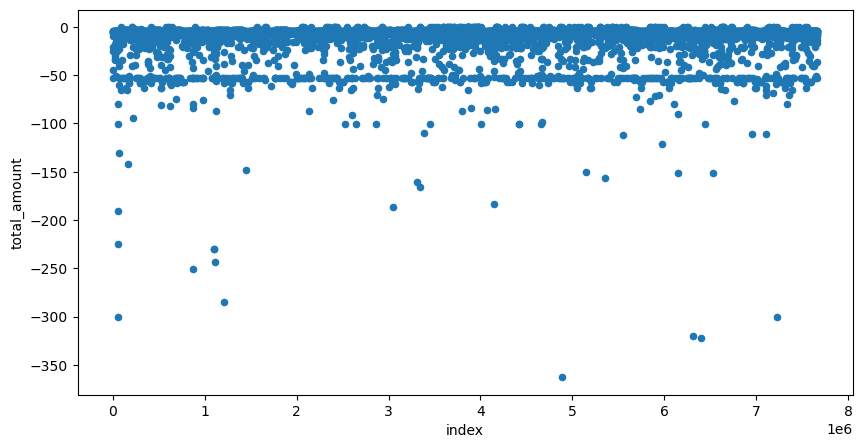

In [34]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.show()

In [ ]:
# there are 7127 data points with a negative total_amount
# Compared to the total number of data points in the dataset (7.7 million) removing ~7000 data points would only correspong to the loss of 0.1% of all data

In [35]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-2.5,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-19.0,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-8.5,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-2.5,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-3.0,-4.3


In [36]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
3    4083
4    2667
2     376
1       1
Name: count, dtype: int64

In [37]:
taxi_data[taxi_data['total_amount']>0]['payment_type'].value_counts()

payment_type
1    5485449
2    2136391
3      29069
0      28441
4       8497
Name: count, dtype: int64

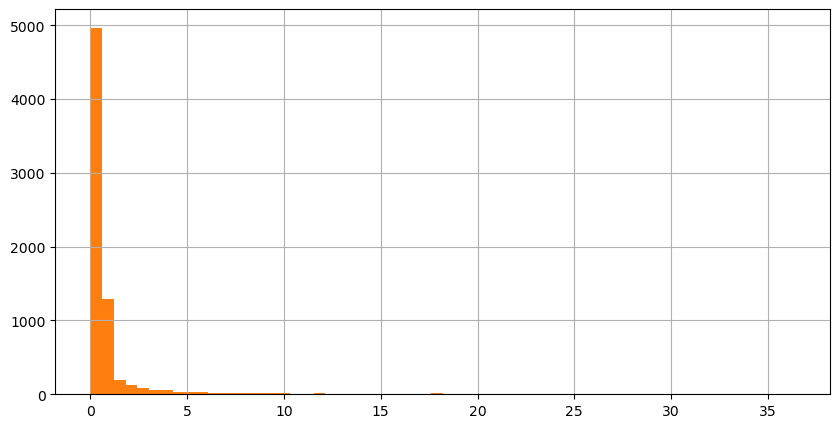

In [39]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))
plt.show()

In [40]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].max()

36.4

In [42]:
print(taxi_data[taxi_data['total_amount']==0].shape)

(1643, 10)


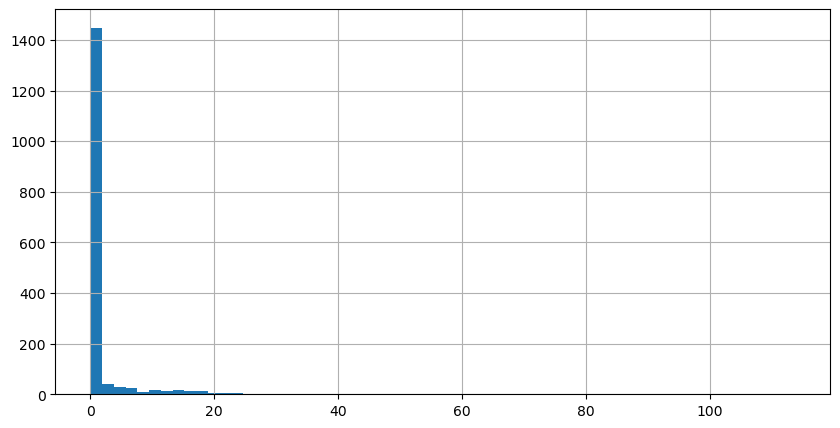

In [44]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5))
plt.show()

In [45]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     1323
0.03        9
0.01        8
0.06        6
1.00        4
         ... 
11.86       1
4.59        1
20.92       1
18.37       1
12.30       1
Name: count, Length: 256, dtype: int64

In [46]:
# total amount of 0 suggests that the trip didn't happen (based on the histogram showing that the most predominant distance value is 0 miles when total amount is equal to 0)

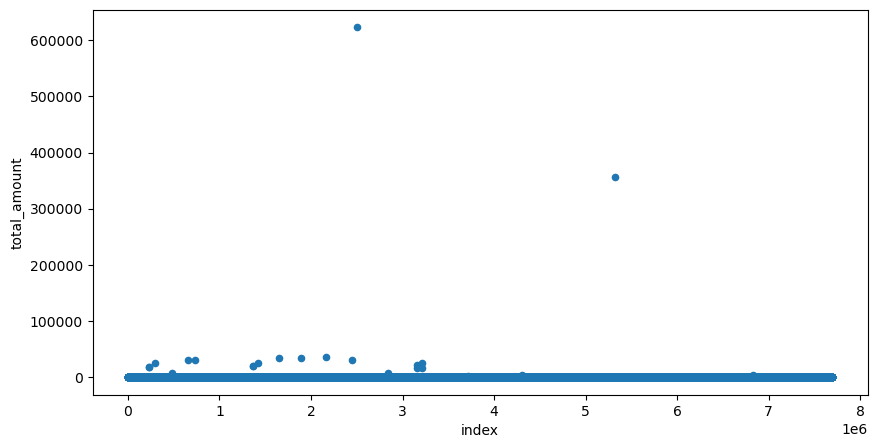

In [47]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.show()

In [50]:
taxi_data[taxi_data['total_amount']>200].shape

# cut off at 200

(1166, 10)

In [51]:
taxi_data['total_amount'].mean()

15.810651344610214

In [52]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0) & (taxi_data['total_amount']<200)]

In [54]:
print(taxi_data.shape)
taxi_data_filtered.shape

(7696617, 10)


(7688319, 10)

In [55]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28672
trip_distance                0
RatecodeID               28672
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
total_amount                 0
dtype: int64

In [56]:
taxi_data_filtered[(taxi_data_filtered['passenger_count'].isnull()) & (taxi_data_filtered['RatecodeID'].isnull())]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
7667945,2019-01-01 00:38:45,2019-01-01 00:54:11,NaN,2.21,NaN,161,263,0,12.24,16.30
7667946,2019-01-01 01:56:58,2019-01-01 02:13:14,NaN,3.17,NaN,256,226,0,15.52,19.59
7667947,2019-01-01 01:59:06,2019-01-01 02:20:24,NaN,6.31,NaN,140,256,0,27.56,34.04
7667948,2019-01-01 02:34:00,2019-01-01 02:34:00,NaN,0.00,NaN,233,233,0,0.00,0.00
7667949,2019-01-01 02:44:00,2019-01-01 03:03:00,NaN,11.86,NaN,246,265,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
7696612,2019-01-31 23:37:20,2019-02-01 00:10:43,NaN,10.24,NaN,142,95,0,0.00,0.00
7696613,2019-01-31 23:28:00,2019-01-31 23:50:50,NaN,12.43,NaN,48,213,0,48.80,54.60
7696614,2019-01-31 23:11:00,2019-01-31 23:46:00,NaN,9.14,NaN,159,246,0,51.05,54.60
7696615,2019-01-31 23:03:00,2019-01-31 23:14:00,NaN,0.00,NaN,265,265,0,0.00,0.00


In [57]:
taxi_no_nulls = taxi_data_filtered[(taxi_data_filtered['passenger_count'].notnull()) & (taxi_data_filtered['RatecodeID'].notnull())]

In [59]:
taxi_no_nulls.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,7.0,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,14.0,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,4.5,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,3.5,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,52.0,55.55


In [60]:
taxi_no_nulls.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
total_amount             0
dtype: int64

In [61]:
taxi_prepared = taxi_no_nulls.copy()